# Capstone Project - The Battle of Neighborhoods

## Introduction and Business Problem Section

In 2020, a pandemic caused by COVID-19 severely hits the world. The Philippine is no exception in which the country has cases around more than 20,000 during June 2020. The economy opens after the 3-month lockdown eventhough the cases still rampant. Due to the uncertainty brought by the pandemic, homebuyers are hesitant to invest in real estate. However, this problem is not for lifetime and more people are adopting now the new normal especially the country's financial district, Makati City. 

This project will adopt machine learning tools in order to assist homebuyers clientele in Makati to make wise and effective decisions. As a result, the business problem we are currently posing is: how could we provide support to homebuyers clientele in to purchase a suitable real estate in Makati in this uncertain economic and financial scenario?

To solve this business problem, will going to cluster Makati neighborhoods in order to recommend venues and the current average price of real estate where homebuyers can make a real estate investment. We will recommend profitable venues according to amenities and essential facilities surrounding such venues i.e. elementary schools, high schools, hospitals & grocery stores.

## Data Section

To explore and target recommended locations across different venues according to the presence of amenities and essential facilities, we will access data through FourSquare API interface and arrange them as a dataframe for visualization. By merging data on Makati properties and data on amenities and essential facilities surrounding such properties from FourSquare API interface, we will be able to recommend profitable real estate investments.

## Methodology Section

The Methodology section will describe the main components of our analysis and predication system. The Methodology section comprises four stages:

1. Collect Inspection Data
2. Explore and Understand Data
3. Data preparation and preprocessing 
4. Modeling

#### 1. Collect Inspection Data

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Mark Angelo Ruz\miniconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         184 KB  conda-forge
    certifi-2020.6.20          |   py37hc8dfbb8_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         335 KB

The following packages will be UPDATED:

  ca-certificates                     2020.4.5.2-hecda079_0 --> 2020.6.20-hecda079_0
  certifi                         2020.4.5.2-py37hc8dfbb8_0 --> 2020.6.20-py37hc8dfbb8_0




ca-certificates-2020 | 184 KB    |            |   0% 
ca-certificates-2020 | 184 KB    | 8          |   9% 
ca-certificates-2020 | 184 KB    | ####3      |  44% 
ca-certificates-2020 | 184 

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


In [2]:
ph = r'C:\Users\Mark Angelo Ruz\Downloads\phcities.csv'
phcities = pd.read_csv(ph)

In [3]:
phcities.head()

,city,Neighborhood,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Manila,Manila,14.6042,120.9822,Philippines,PH,PHL,Manila,primary,11100000.0,1608618140
1,Quezon City,Quezon City,14.6504,121.0300,Philippines,PH,PHL,Quezon,admin,2761720.0,1608974097
2,Davao,Davao,7.1100,125.6300,Philippines,PH,PHL,Davao,admin,1402000.0,1608906877
3,Cagayan de Oro,Cagayan de Oro,8.4508,124.6853,Philippines,PH,PHL,Cagayan de Oro,admin,1121561.0,1608831546
4,General Santos,General Santos,6.1108,125.1747,Philippines,PH,PHL,General Santos,admin,950530.0,1608171585


In [5]:
import warnings
warnings.filterwarnings('ignore')
address = 'Philippines'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The geograpical coordinate of Philippines are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of Philippines are 12.7503486, 122.7312101.


In [6]:
# create map of Toronto using latitude and longitude values
map_ph = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

# add markers to map
for lat, lng, nei in zip(phcities['lat'], phcities['lng'], phcities['city']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ph)  
    
map_ph

In [7]:
address = 'Makati City, Philippines'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The geograpical coordinate of neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of neighborhood_1 are 12.7503486, 122.7312101.


In [8]:
CLIENT_ID = 'HOYQVEIQK2RHBCPR4ZATFNREA2AVAFKVT4JLNXWE23NKLXPW' # your Foursquare ID
CLIENT_SECRET = 'BKEBWN0KG5XGOWUPPFO5DSM4HSAOPAZR2TUHVON2POXWQ3IG' # your Foursquare Secret
VERSION = '20181216' # Foursquare API version

In [9]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)

In [10]:
results = requests.get(url).json()

In [11]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups',
       'venue.location.labeledLatLngs', 'venue.location.neighborhood',
       'venue.venuePage.id'],
      dtype='object')

In [12]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Ayala Triangle Gardens,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",14.556471,121.023204
1,Banapple Pies & Cheesecakes,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",14.556634,121.023619
2,The Penthouse 8747,"[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",14.558021,121.024266
3,The Peninsula Manila,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",14.555066,121.025466
4,Escolta,"[{'id': '4eb1bd1c3b7b55596b4a748f', 'name': 'F...",14.555485,121.025509


In [14]:
nearby_venues.head(9)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Ayala Triangle Gardens,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",14.556471,121.023204
1,Banapple Pies & Cheesecakes,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",14.556634,121.023619
2,The Penthouse 8747,"[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",14.558021,121.024266
3,The Peninsula Manila,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",14.555066,121.025466
4,Escolta,"[{'id': '4eb1bd1c3b7b55596b4a748f', 'name': 'F...",14.555485,121.025509
5,Apartment 1B,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",14.559042,121.022298
6,Top of the Citi by Chef Jessie,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",14.558932,121.025147
7,The Peninsula Boutique,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",14.554998,121.025327
8,Starbucks Reserve,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",14.558293,121.021582


In [15]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Ayala Triangle Gardens,Park,14.556471,121.023204
1,Banapple Pies & Cheesecakes,Restaurant,14.556634,121.023619
2,The Penthouse 8747,Lounge,14.558021,121.024266
3,The Peninsula Manila,Hotel,14.555066,121.025466
4,Escolta,Filipino Restaurant,14.555485,121.025509


In [16]:
nearby_venues.head(10)

,name,categories,lat,lng
0,Ayala Triangle Gardens,Park,14.556471,121.023204
1,Banapple Pies & Cheesecakes,Restaurant,14.556634,121.023619
2,The Penthouse 8747,Lounge,14.558021,121.024266
3,The Peninsula Manila,Hotel,14.555066,121.025466
4,Escolta,Filipino Restaurant,14.555485,121.025509
5,Apartment 1B,Restaurant,14.559042,121.022298
6,Top of the Citi by Chef Jessie,Restaurant,14.558932,121.025147
7,The Peninsula Boutique,Bakery,14.554998,121.025327
8,Starbucks Reserve,Coffee Shop,14.558293,121.021582
9,Salcedo Community Market,Farmers Market,14.559990,121.023140


In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
        CLIENT_SECRET, 
            VERSION,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
makati_venues = getNearbyVenues(names=phcities['city'],
                                   latitudes=phcities['lat'],
                                   longitudes=phcities['lng']
                                  )

In [21]:
makati_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alabel,4,4,4,4,4,4
Angeles City,1,1,1,1,1,1
Antipolo,25,25,25,25,25,25
Bacolod,1,1,1,1,1,1
Baguio City,5,5,5,5,5,5


In [22]:
print('There are {} uniques categories.'.format(len(makati_venues['Venue Category'].unique())))

There are 209 uniques categories.


In [23]:
# One hot encoding

makati_onehot = pd.get_dummies(makati_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
makati_onehot['Neighborhood'] = makati_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [makati_onehot.columns[-1]] + list(makati_onehot.columns[:-1])
makati_onehot = makati_onehot[fixed_columns]
makati_onehot.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Garden,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Camera Store,Cantonese Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Church,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Shop,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fishing Store,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Laundromat,Light Rail Station,Lighthouse,Lounge,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motel,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,Nightclub,Noodle House,Office,Optical Shop,Other Nightlife,Outdoors & Recreation,Outlet Mall,Paella Restaurant,Park,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Port,Pub,Public Art,Ramen Restaurant,Recreation Center,Resort,Rest Area,Restaurant,Road,Roof Deck,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soup Place,South American Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Stables,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Track Stadium,Travel Lounge,Tree,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Women's Store,Yoga Studio
0,Manila,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Manila,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Manila,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [25]:
makati_onehot.shape

(2034, 210)

In [26]:
makati_grouped = makati_onehot.groupby('Neighborhood').mean().reset_index()
makati_grouped.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Garden,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Camera Store,Cantonese Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Church,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Shop,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fishing Store,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Laundromat,Light Rail Station,Lighthouse,Lounge,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motel,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,Nightclub,Noodle House,Office,Optical Shop,Other Nightlife,Outdoors & Recreation,Outlet Mall,Paella Restaurant,Park,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Port,Pub,Public Art,Ramen Restaurant,Recreation Center,Resort,Rest Area,Restaurant,Road,Roof Deck,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soup Place,South American Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Stables,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Track Stadium,Travel Lounge,Tree,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Women's Store,Yoga Studio
0,Alabel,0.0,0.0,0.25,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Angeles City,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0

In [27]:
makati_grouped.shape

(104, 210)

In [28]:
num_top_venues = 5
for hood in makati_grouped['Neighborhood'][:3]:
    print("----"+hood+"----")
    temp = makati_grouped[makati_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alabel----
                 venue  freq
0               Market  0.25
1  American Restaurant  0.25
2    Convenience Store  0.25
3                  Bar  0.25
4    Accessories Store  0.00


----Angeles City----
               venue  freq
0               Tree   1.0
1  Accessories Store   0.0
2  Paella Restaurant   0.0
3        Music Venue   0.0
4         Nail Salon   0.0


----Antipolo----
                  venue  freq
0     Convenience Store  0.16
1   Filipino Restaurant  0.16
2             BBQ Joint  0.12
3  Fast Food Restaurant  0.08
4    Chinese Restaurant  0.08




In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = makati_grouped['Neighborhood']

for ind in np.arange(makati_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(makati_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alabel,Bar,American Restaurant,Convenience Store,Market,Event Space,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store
1,Angeles City,Tree,Yoga Studio,English Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store,Filipino Restaurant,Field
2,Antipolo,Convenience Store,Filipino Restaurant,BBQ Joint,Fast Food Restaurant,Chinese Restaurant,Garden,Botanical Garden,Supermarket,Steakhouse,Grocery Store
3,Bacolod,Cafeteria,Yoga Studio,Deli / Bodega,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store,Filipino Restaurant,Field
4,Baguio City,Sculpture Garden,Breakfast Spot,Art Gallery,Filipino Restaurant,Event Space,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store


In [31]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

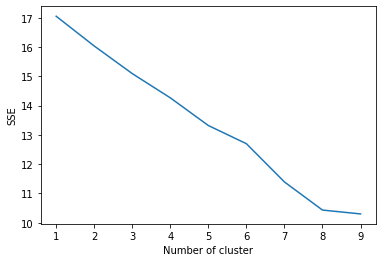

In [32]:
makati_grouped_clustering = makati_grouped.drop('Neighborhood', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(makati_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
import numpy as np

For 2  Clusters  the average silhouette_score is : 0.528872941927344
For 3  Clusters  the average silhouette_score is : 0.5318453937986247
For 4  Clusters  the average silhouette_score is : 0.5240222122943556
For 5  Clusters  the average silhouette_score is : 0.4424030313059643


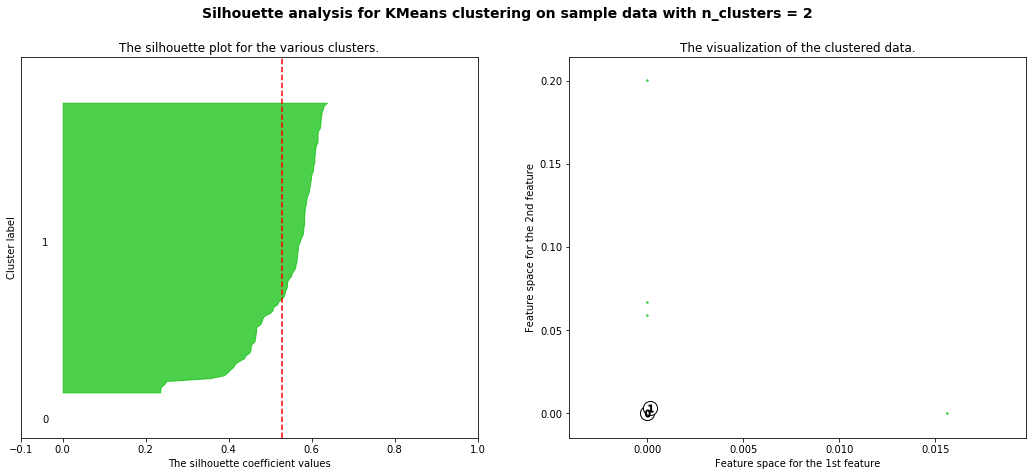

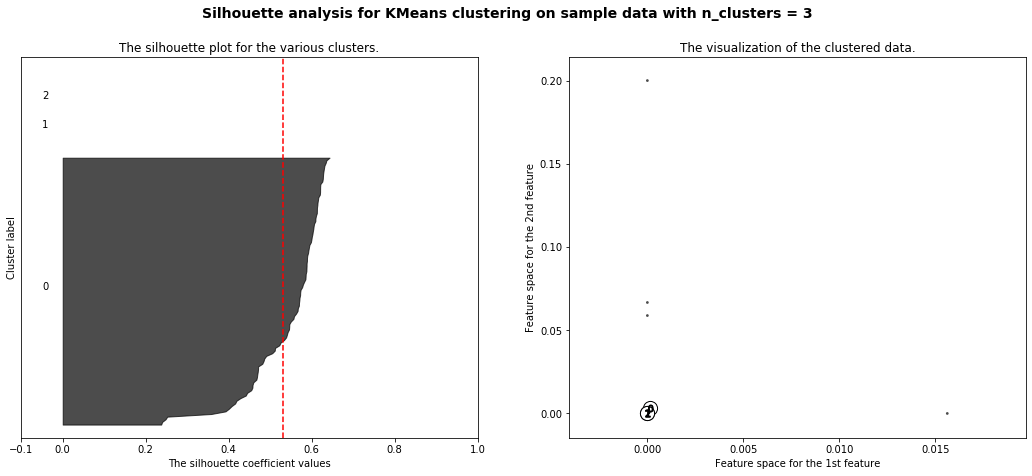

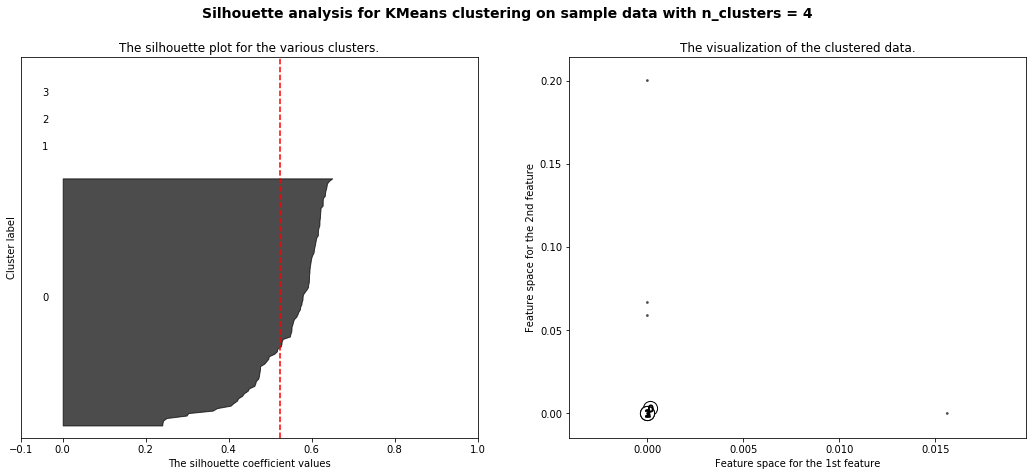

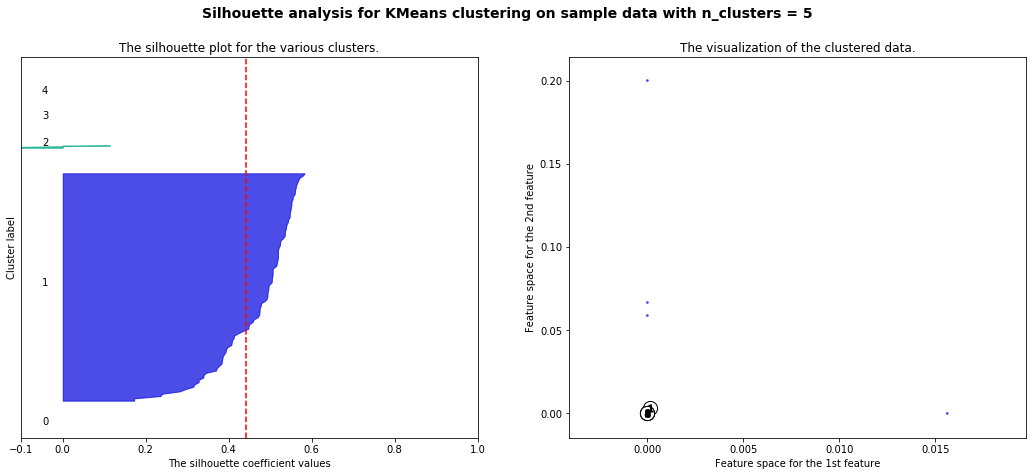

In [34]:
range_n_clusters=[2,3,4,5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(makati_grouped_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(makati_grouped_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(makati_grouped_clustering, cluster_labels)
    print("For", n_clusters, " Clusters  "
          "the average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(makati_grouped_clustering, cluster_labels)

    y_lower = 5
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color1 = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color1, edgecolor=color1, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors2 = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(makati_grouped_clustering.iloc[:, 0], makati_grouped_clustering.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors2, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [70]:
kclusters = 3

makati_grouped_clustering = makati_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(makati_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [71]:
makati_merge = makati_grouped

# add clustering labels
makati_merge['Cluster Labels'] = kmeans.labels_

# merge makati_grouped with chicago_data to add latitude/longitude for each neighborhood
makati_merge = makati_merge.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

makati_merge.head()# check the last columns!

,Neighborhood,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Garden,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Camera Store,Cantonese Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Church,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Shop,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fishing Store,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Laundromat,Light Rail Station,Lighthouse,Lounge,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motel,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,Nightclub,Noodle House,Office,Optical Shop,Other Nightlife,Outdoors & Recreation,Outlet Mall,Paella Restaurant,Park,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Port,Pub,Public Art,Ramen Restaurant,Recreation Center,Resort,Rest Area,Restaurant,Road,Roof Deck,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soup Place,South American Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Stables,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Track Stadium,Travel Lounge,Tree,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Women's Store,Yoga Studio,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alabel,0.0,0.0,0.25,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Bar,American Restaurant,Convenience Store,Market,Event Space,Food Court,Food & Drink 

In [72]:
makati_merge1 = makati_merge.drop(makati_merge.loc[:, 'Accessories Store':'Yoga Studio'].columns, axis = 1)

In [73]:
makati_merge1

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alabel,1,Bar,American Restaurant,Convenience Store,Market,Event Space,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store
1,Angeles City,0,Tree,Yoga Studio,English Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store,Filipino Restaurant,Field
2,Antipolo,1,Convenience Store,Filipino Restaurant,BBQ Joint,Fast Food Restaurant,Chinese Restaurant,Garden,Botanical Garden,Supermarket,Steakhouse,Grocery Store
3,Bacolod,1,Cafeteria,Yoga Studio,Deli / Bodega,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store,Filipino Restaurant,Field
4,Baguio City,1,Sculpture Garden,Breakfast Spot,Art Gallery,Filipino Restaurant,Event Space,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store
5,Balanga,1,Fast Food Restaurant,Convenience Store,Coffee Shop,Pizza Place,Plaza,Bar,Chinese Restaurant,Tea Room,Mobile Phone Shop,Filipino Restaurant
6,Baler,1,Filipino Restaurant,Market,Bubble Tea Shop,Bakery,Bus Line,Bus Station,Café,Seafood Restaurant,Chinese Restaurant,Gift Shop
7,Bangued,1,Fast Food Restaurant,Soup Place,Noodle House,Church,Yoga Studio,Event Space,Food,Flea Market,Fishing Store,Filipino Restaurant
8,Basco,1,Café,Hostel,Hotel,Filipino Restaurant,Bed & Breakfast,Pizza Place,Diner,Resort,Field,Lighthouse
9,Batangas,1,Bridal Shop,Convenience Store,Art Gallery,Restaurant,Park,Event Space,Food & Drink Shop,Food,Flea Market,Fishing Store


In [74]:
phcities.shape

(118, 11)

In [75]:
makati_merge1.shape

(104, 12)

In [76]:
makati_merged = pd.merge(phcities, makati_merge1, left_on='Neighborhood', right_on='Neighborhood')
makati_merged

,city,Neighborhood,lat,lng,country,iso2,iso3,admin_name,capital,population,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manila,Manila,14.6042,120.9822,Philippines,PH,PHL,Manila,primary,11100000.0,1608618140,1,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Filipino Restaurant,Café,Coffee Shop,Bakery,Noodle House,Japanese Restaurant,Korean Restaurant
1,Quezon City,Quezon City,14.6504,121.0300,Philippines,PH,PHL,Quezon,admin,2761720.0,1608974097,1,Coffee Shop,Café,Japanese Restaurant,Spa,Chinese Restaurant,Bakery,Shopping Mall,Ice Cream Shop,Clothing Store,Pizza Place
2,Davao,Davao,7.1100,125.6300,Philippines,PH,PHL,Davao,admin,1402000.0,1608906877,1,Hotel,Fast Food Restaurant,Hotel Bar,Bakery,Diner,Recreation Center,Resort,Restaurant,Scenic Lookout,Snack Place
3,Cagayan de Oro,Cagayan de Oro,8.4508,124.6853,Philippines,PH,PHL,Cagayan de Oro,admin,1121561.0,1608831546,2,Korean Restaurant,Yoga Studio,Event Space,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store,Filipino Restaurant,Field
4,General Santos,General Santos,6.1108,125.1747,Philippines,PH,PHL,General Santos,admin,950530.0,1608171585,1,Diner,Filipino Restaurant,Hotel,Fast Food Restaurant,Seafood Restaurant,Market,Coffee Shop,Bakery,Spa,Restaurant
5,Bacolod,Bacolod,10.6317,122.9817,Philippines,PH,PHL,Bacolod,admin,949354.0,1608244137,1,Cafeteria,Yoga Studio,Deli / Bodega,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store,Filipino Restaurant,Field
6,Cebu City,Cebu City,10.3200,123.9001,Philippines,PH,PHL,Cebu,admin,815000.0,1608136151,1,Coffee Shop,Café,Restaurant,Shopping Mall,Yoga Studio,Steakhouse,Italian Restaurant,Chinese Restaurant,Clothing Store,Bookstore
7,Zamboanga City,Zamboanga City,6.9200,122.0800,Philippines,PH,PHL,Zamboanga,admin,773000.0,1608189351,1,Creperie,Coffee Shop,Fast Food Restaurant,Café,Asian Restaurant,Pizza Place,Gas Station,Donut Shop,Shopping Mall,Snack Place
8,Naga City,Naga City,13.6192,123.1814,Philippines,PH,PHL,Naga,admin,741635.0,1608775993,1,Department Store,Bakery,Fast Food Restaurant,Asian Restaurant,Filipino Restaurant,Shopping Mall,Sporting Goods Shop,Pharmacy,Flea Market,Snack Place
9,Baguio City,Baguio City,16.4300,120.5699,Philippines,PH,PHL,Baguio,admin,447824.0,1608164766,1,Sculpture Garden,Breakfast Spot,Art Gallery,Filipino Restaurant,Event Space,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store


In [77]:
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)
import matplotlib.colors as colors
# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(makati_merged['lat'], makati_merged['lng'], makati_merged['Neighborhood'], makati_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#80ffb4', '#ff0000']


In [78]:
df1=makati_merged.loc[makati_merged['Cluster Labels'] == 0,makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]
df1

,Neighborhood,iso2,iso3,admin_name,capital,population,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Angeles City,PH,PHL,Angeles,admin,314493.0,1608036027,0,Tree,Yoga Studio,English Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store,Filipino Restaurant,Field
99,Shariff Aguak,PH,PHL,Maguindanao,admin,NaN,1608346338,0,Market,Yoga Studio,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store,Filipino Restaurant,Field
101,Jordan,PH,PHL,Guimaras,admin,NaN,1608769914,0,Plaza,Yoga Studio,Event Space,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store,Filipino Restaurant,Field


In [79]:
df2=makati_merged.loc[makati_merged['Cluster Labels'] == 1,makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]
df2

,Neighborhood,iso2,iso3,admin_name,capital,population,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manila,PH,PHL,Manila,primary,11100000.0,1608618140,1,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Filipino Restaurant,Café,Coffee Shop,Bakery,Noodle House,Japanese Restaurant,Korean Restaurant
1,Quezon City,PH,PHL,Quezon,admin,2761720.0,1608974097,1,Coffee Shop,Café,Japanese Restaurant,Spa,Chinese Restaurant,Bakery,Shopping Mall,Ice Cream Shop,Clothing Store,Pizza Place
2,Davao,PH,PHL,Davao,admin,1402000.0,1608906877,1,Hotel,Fast Food Restaurant,Hotel Bar,Bakery,Diner,Recreation Center,Resort,Restaurant,Scenic Lookout,Snack Place
4,General Santos,PH,PHL,General Santos,admin,950530.0,1608171585,1,Diner,Filipino Restaurant,Hotel,Fast Food Restaurant,Seafood Restaurant,Market,Coffee Shop,Bakery,Spa,Restaurant
5,Bacolod,PH,PHL,Bacolod,admin,949354.0,1608244137,1,Cafeteria,Yoga Studio,Deli / Bodega,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store,Filipino Restaurant,Field
6,Cebu City,PH,PHL,Cebu,admin,815000.0,1608136151,1,Coffee Shop,Café,Restaurant,Shopping Mall,Yoga Studio,Steakhouse,Italian Restaurant,Chinese Restaurant,Clothing Store,Bookstore
7,Zamboanga City,PH,PHL,Zamboanga,admin,773000.0,1608189351,1,Creperie,Coffee Shop,Fast Food Restaurant,Café,Asian Restaurant,Pizza Place,Gas Station,Donut Shop,Shopping Mall,Snack Place
8,Naga City,PH,PHL,Naga,admin,741635.0,1608775993,1,Department Store,Bakery,Fast Food Restaurant,Asian Restaurant,Filipino Restaurant,Shopping Mall,Sporting Goods Shop,Pharmacy,Flea Market,Snack Place
9,Baguio City,PH,PHL,Baguio,admin,447824.0,1608164766,1,Sculpture Garden,Breakfast Spot,Art Gallery,Filipino Restaurant,Event Space,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store
10,Batangas,PH,PHL,Batangas,admin,424508.0,1608417616,1,Bridal Shop,Convenience Store,Art Gallery,Restaurant,Park,Event Space,Food & Drink Shop,Food,Flea Market,Fishing Store


In [80]:
df3=makati_merged.loc[makati_merged['Cluster Labels'] == 2,makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]
df3

,Neighborhood,iso2,iso3,admin_name,capital,population,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Cagayan de Oro,PH,PHL,Cagayan de Oro,admin,1121561.0,1608831546,2,Korean Restaurant,Yoga Studio,Event Space,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store,Filipino Restaurant,Field
96,Palayan City,PH,PHL,Nueva Ecija,admin,NaN,1608192136,2,Stables,Yoga Studio,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store,Filipino Restaurant,Field,Fast Food Restaurant


In [82]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster3":df3["Neighborhood"],
                       "Cluster4":df4["Neighborhood"]
                      })

In [83]:
clusters = clusters.replace(np.nan, '', regex=True)

In [84]:
clusters

,Cluster1,Cluster2,Cluster3,Cluster4
0,,Manila,,
1,,Quezon City,,
2,,Davao,,
3,,,Cagayan de Oro,
4,,General Santos,,
5,,Bacolod,,
6,,Cebu City,,
7,,Zamboanga City,,
8,,Naga City,,
9,,Baguio City,,


In [85]:
new_makati=makati_merged.set_index("Neighborhood",drop=True)
new_makati.head()

,city,lat,lng,country,iso2,iso3,admin_name,capital,population,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Manila,Manila,14.6042,120.9822,Philippines,PH,PHL,Manila,primary,11100000.0,1608618140,1,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Filipino Restaurant,Café,Coffee Shop,Bakery,Noodle House,Japanese Restaurant,Korean Restaurant
Quezon City,Quezon City,14.6504,121.0300,Philippines,PH,PHL,Quezon,admin,2761720.0,1608974097,1,Coffee Shop,Café,Japanese Restaurant,Spa,Chinese Restaurant,Bakery,Shopping Mall,Ice Cream Shop,Clothing Store,Pizza Place
Davao,Davao,7.1100,125.6300,Philippines,PH,PHL,Davao,admin,1402000.0,1608906877,1,Hotel,Fast Food Restaurant,Hotel Bar,Bakery,Diner,Recreation Center,Resort,Restaurant,Scenic Lookout,Snack Place
Cagayan de Oro,Cagayan de Oro,8.4508,124.6853,Philippines,PH,PHL,Cagayan de Oro,admin,1121561.0,1608831546,2,Korean Restaurant,Yoga Studio,Event Space,Food Court,Food & Drink Shop,Food,Flea Market,Fishing Store,Filipino Restaurant,Field
General Santos,General Santos,6.1108,125.1747,Philippines,PH,PHL,General Santos,admin,950530.0,1608171585,1,Diner,Filipino Restaurant,Hotel,Fast Food Restaurant,Seafood Restaurant,Market,Coffee Shop,Bakery,Spa,Restaurant
